# Homework 3 - Principal Component Analysis on Neuron Spike Sorting
You should have downloaded:
- spikes.csv

The homework performs PCA, but in a setting that will feel less familiar from simpler examples seen in lecture or section. But the underlying mathematics in identical and you will get a chance to see a more "real-life" application of PCA.

# 0 Introduction

A large amount of research in neuroscience is based on the study of the activity of neurons recorded extracellularly with microwires (very thin electrodes) implanted in animals’ brains. These microwires ‘listen’ to **a few neurons close-by** the electrode tip that fire action potentials or ‘spikes’. **Each neuron has spikes of a characteristic shape**, which is determined by a variety of factors.

Spike sorting seeks to **group spikes into clusters** based on the similarity of their shapes. Each cluster of spikes will correspond to individual neurons. Thus, we can understand neuron activity better if we can study their activity from the spikes in the data.

We will process sample neuronal voltage recordings and use Principal Component Analysis (PCA) to separate spikes.

Reference: http://www.scholarpedia.org/article/Spike_sorting

This data has been preprocesed and centered for each spike to coincide with the others. 
- There are 3298 spikes.
- Each spike contains 70 recordings representing 70 $ms$ of data. So, there are 70 features per datum.

# 1 Load and visualize data
**Task:**
1. [1 pt] Load two dimensional array `X` in which:
    - rows are the 70 voltage readings for each spike (number of features)
    - columns are observed spikes (number of data)

2. [2 pt] Display the first 30 spikes in one figure.
    - the horizontal axis would be the 70 recordings, in $ms$.
    - the vertical axis would be the voltage, in $mV$.
    - Include axis labels and a title

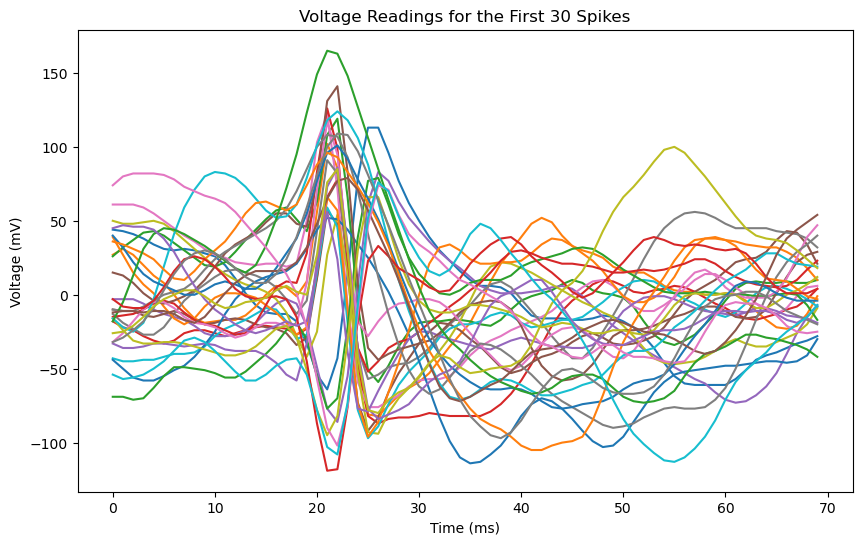

In [1]:
# TODO load

import numpy as np
import matplotlib.pyplot as plt

# Loading the data from spikes.csv
data = np.loadtxt('spikes.csv', delimiter=',')

# Extracting the first 30 spikes
first_30_spikes = data[:, :30]





# TODO plot


# Creating a figure
plt.figure(figsize=(10, 6))

# Plotingt the first 30 spikes
for spike_num in range(30):
    plt.plot(first_30_spikes[:, spike_num], label=f'Spike {spike_num + 1}')


plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Voltage Readings for the First 30 Spikes')
#plt.grid()

#plt.legend()

# Show the plot
plt.show()


# 2 PCA

We are interested in correlating ''spikes in the waveform'' to ''the activity of neurons''. 

The difficulty arrises from the fact that observed spikes can arise from the different neurons that are firing in the neighborhood of microwire (detector). Interactions (''correlation'') between spikes from different neuronal population can siginificantly change the voltage recording shape. For example, the peak of action potential from neuronal acticivity from one cell can be reduced if it concides with the dip of action potential from another cell firing. 

Historically, PCA has been proposed as a method to seperate spikes into clusters of neuronal activity. Let's try it ourselves.

## 2.1 Eigendecomposition by sklearn
**Task:** 
1. [1 pt] Center data by subtracting the mean, store it as ```data_ctd```. 
2. [4 pt] Use the sklearn PCA package to:
    - fit data
    - find covariance matrix, store it as ```cov_mat```
    - find eigenvalues/singular values, store it as ```evals``` (Rmk: singular_values_ is not singular values, Go figure. -.-)
    - find principal components, store it as ```evecs```. Your columns should be the eigenvectors. (Rmk: package gives tranposed version, i.e., rows are the principal components, not columns.)

Through this exercise, we should gain familiarity with the package and understand that you MUST read documentation before using packages.

In [2]:
# TODO sklearn pca


from sklearn.decomposition import PCA

# Calculate the mean of each row of the dataset
mean_of_data = np.mean(data, axis = 1, keepdims = True)

# Subtract the mean of each row of the dataset
data_ctd = data - mean_of_data


pca = PCA()

# Fit the data
pca.fit(data_ctd.T)  # Transpose because sklearn's PCA expects features along rows, not columns

# Get covariance matrix
cov_mat = pca.get_covariance()
print('cov_matrix = ', cov_mat)

# Get eigenvalues/singular values

evals = pca.explained_variance_
print('eigenvalues = ',evals)

# Get principal components (eigenvectors)
evecs = pca.components_.T  # Transpose because sklearn returns transposed version
print('eigenvectors = ',evecs)





cov_matrix =  [[760.06570871 733.01343688 675.49794666 ...  10.98679156  13.05804236
   12.25726495]
 [733.01343688 744.56119351 722.14424492 ...   6.81739358   9.78106142
   10.45182327]
 [675.49794666 722.14424492 743.73065136 ...   2.32186675   5.93245858
    7.55038403]
 ...
 [ 10.98679156   6.81739358   2.32186675 ... 788.11259809 765.99058703
  704.69880074]
 [ 13.05804236   9.78106142   5.93245858 ... 765.99058703 787.61213393
  763.33967241]
 [ 12.25726495  10.45182327   7.55038403 ... 704.69880074 763.33967241
  788.49808489]]
eigenvalues =  [4.79156742e+04 2.15990601e+04 1.07647570e+04 8.13269178e+03
 7.08089023e+03 3.91342080e+03 2.99855515e+03 2.77285145e+03
 1.97035523e+03 1.52078345e+03 1.23555840e+03 8.75230349e+02
 7.32396152e+02 5.18541726e+02 4.00627913e+02 2.87844048e+02
 2.12268026e+02 1.53333892e+02 1.22923744e+02 9.13714257e+01
 7.70354677e+01 6.16193980e+01 5.22824512e+01 5.03155508e+01
 4.30827252e+01 3.63309011e+01 3.15395919e+01 2.64998431e+01
 2.09134994e+01 

# 2.2 Scree plot
1. [1 pt] What is a "scree"? What does it mean? This is not a math question. Google it and spend 10 minutes of fun on the web.

    **Ans:** A scree is a collection of somewhat small rocks that accumulate at the bottom or on the side of a mountain. They are created because rocks fall down the mountain due to erosion and pile up in one place where the mountain is not as steep. These rocks are "loose", meaning you can't easily walk on a scree - it would be like walking on gravel but with significantly larger rocks. 
2. [2 pt] Make a scree plot of the eigenvalues of the covariance matrix.
    - Include title and axis labels

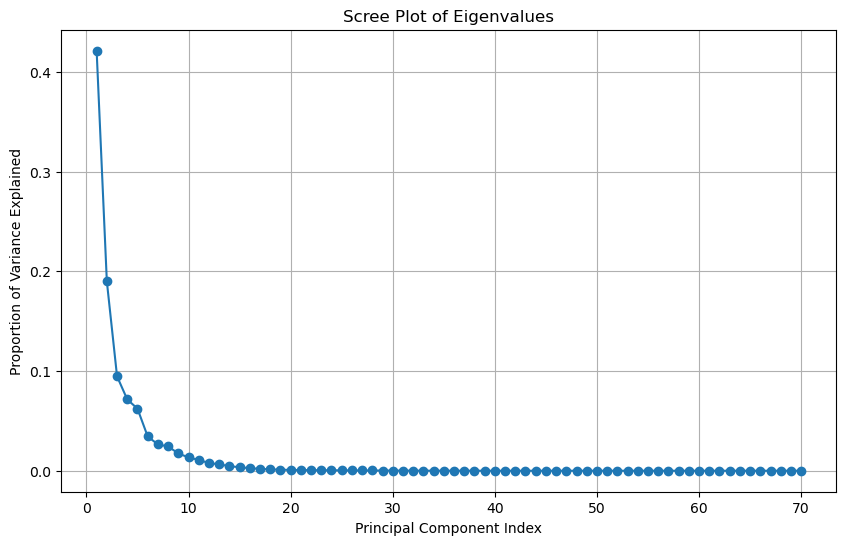

In [3]:
# TODO plot

#Note: pca returns the eigenvalues in descending order

# Calculate the proportion of total variance explained by each eigenvalue
variance_explained = evals / np.sum(evals)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(evals) + 1), variance_explained, marker='o')
plt.title('Scree Plot of Eigenvalues')
plt.xlabel('Principal Component Index')
plt.ylabel('Proportion of Variance Explained')
plt.grid(True)
plt.show()

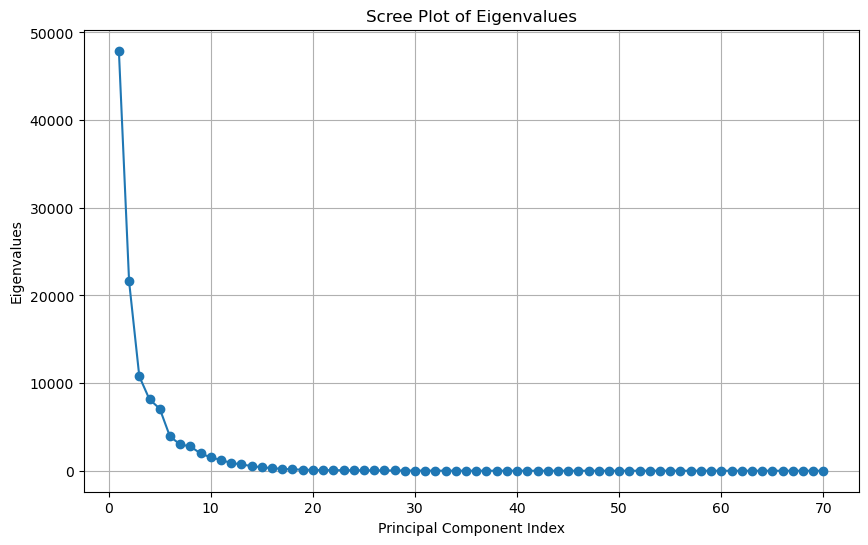

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(evals) + 1), evals, marker='o')
plt.title('Scree Plot of Eigenvalues')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.show()

# 3 Eigenbasis
## 3.1 Visualization of principal components
1. [2 pt] Generate a 2D plot to display the first 4 principal components.
- Each PC is basically a spike signal, like those plotted earlier. This is how we will visualize a 70-dimensional vector in a two dimensional plot.
- Include a title, legend, and axis labels.

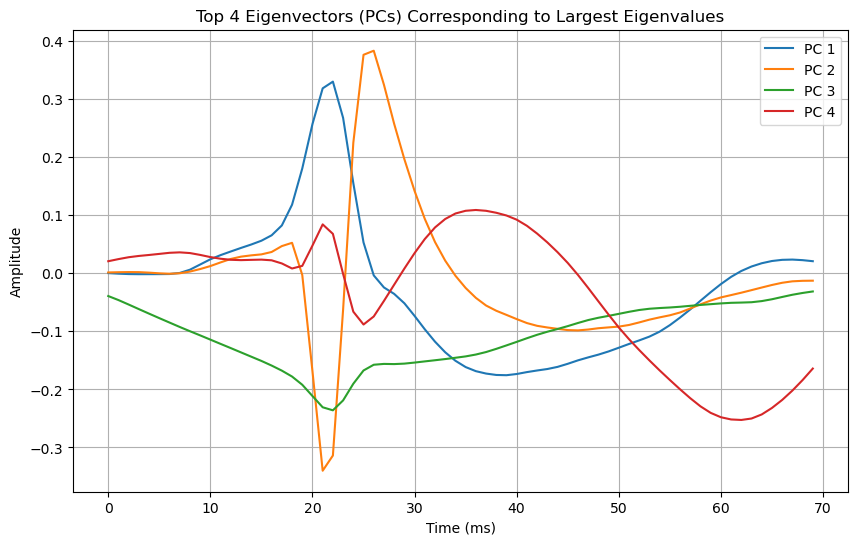

In [5]:
# TODO plot PCs


# Extract the corresponding top 4 eigenvectors
top_4_evecs = evecs[:, :4]

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the top 4 eigenvectors
for pc_index in range(4):
    plt.plot(top_4_evecs[:, pc_index], label=f'PC {pc_index + 1}')

# Add labels and title
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Top 4 Eigenvectors (PCs) Corresponding to Largest Eigenvalues')
plt.legend()
plt.grid(True)
plt.show()

2. [1 pt] Write code to verify that the first 4 principal components are indeed orthogonal.

In [6]:
# TODO verify

orthogonality_check = np.allclose((top_4_evecs.T @ top_4_evecs), np.eye(4))


if orthogonality_check:
    print("The first 4 principal components are orthogonal.")
else:
    print("The first 4 principal components are not orthogonal.")


The first 4 principal components are orthogonal.


## 3.2 Signal reconstruction without sklearn
Because the principal components form an basis, each spike can be reconstructed using a weighted sum of the principal components. In this subsection, do not use sklearn package.
**Task:**

In the same figure,
1. [1 pt] Plot the first PC spike, ```spike01```, by indexing the correct row/column of `evecs`. 
    - Use solid line to differentiate it more easily from the next plots below.
2. [2 pt] Reconstruct an approximation to ```spike01``` using the first prinicpal component only. 
    - Remember, we are using only one component, so the reconstruction will not be precise, it is only approximate. Use dashed lines to differentiate it from the true ```spike01```.
3. [1 pt] Then repeat the reconstruction of ```spike01``` using the first two, first three, first four, and finally all principal components. Might help to use a for-loop.

4. [1 pt] Your plots should include title, legend, axis labels.

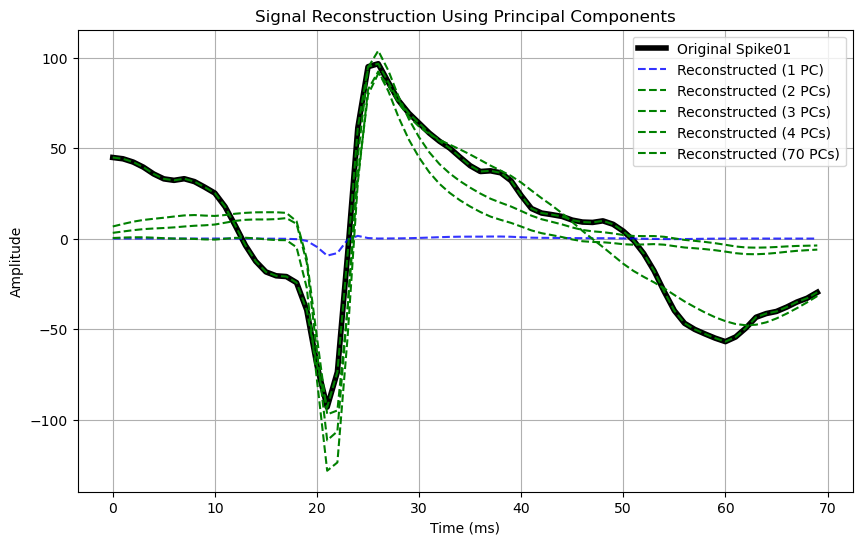

In [7]:
# TODO plot

from matplotlib.cm import Reds, Blues

spike01 = data_ctd[:, 0]

# Extract the first PC
first_pc = evecs[:, 0]

# Reconstruct spike01 using the first principal component
reconstructed_spike_1 = (spike01 * first_pc) * first_pc



# Create a figure
plt.figure(figsize=(10, 6))

# Plot the original spike01
plt.plot(spike01, label='Original Spike01', linewidth=4, color='black')  # Black for original data

# Plot the reconstructed spike01 using the first principal component
plt.plot(reconstructed_spike_1, label='Reconstructed (1 PC)', linestyle='--', color='blue', alpha=0.8)  # Blue for 1 PC

# Reconstruct spike01 using the first two, first three, first four, and all principal components

for num_components in [2,3,4,70]:
    reconstructed_spike_n = np.dot(spike01, evecs[:, :num_components]) @ evecs[:, :num_components].T
    plt.plot(reconstructed_spike_n, label=f'Reconstructed ({num_components} PCs)', linestyle='--', color='green')

# Add labels and title
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Signal Reconstruction Using Principal Components')
plt.legend()
plt.grid(True)
plt.show()


## 3.3 Data projection with sklearn

**Task:**
1. [1 pt] Project the centered data ```X_ctd``` onto the principal components using an appropriate method in the sklearn PCA pacakage, store it is ```X_proj```.
    - X_proj should have dimensions 70 by 3298. You may need to take transposes accordingly.
2. [2 pt] What is the interpretation of `X_proj[0,:]`? What does each entry represent? Similarly, what is the interpretation of `X_proj[i,:]` for arbitrary row i?

    **Ans:** `X_proj[0,:]` is the data projected onto the first component and only the first component. You multiply the weights of the principal component by the corresponding values of X to get `X_proj[0,:]`. Each entry represents the estimate by the first principal component to each of the 3298 spikes after the data has been applied.
    
    `X_proj[i,:]` has the same interpretation as above except for the (i+1)th principal component

In [8]:
# TODO project

# Specify the number of components to use
num_components = 70

pca = PCA(n_components=num_components)
X_proj = pca.fit_transform(data_ctd.T).T  # Transpose to match the specified dimensions

# Verify the shape of X_proj
print("Shape of X_proj:", X_proj.shape)



Shape of X_proj: (70, 3298)


In [9]:
X_proj[0,:]

array([-147.14476463, -113.31232773,   42.65143876, ...,   81.56008738,
       -216.87798256,  307.77546363])

# 4 Dimensionality reduction
## 4.1 Histogram
[2 pt] On separate figures:
- plot a histogram of `X_proj[0,:]`
- plot a histogram of `X_proj[1,:]`

Set:
- 50 bins equispaced between [-550,550]

So, each histogram uses 3298 datapoints.

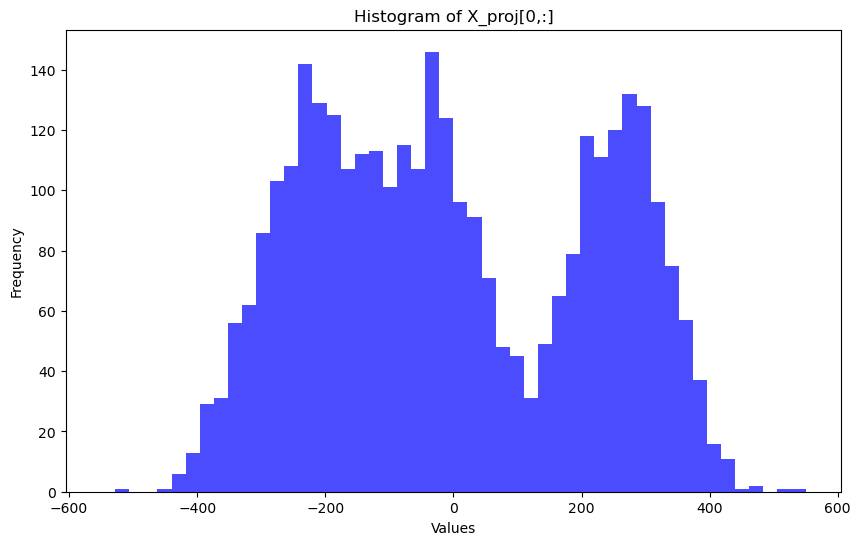

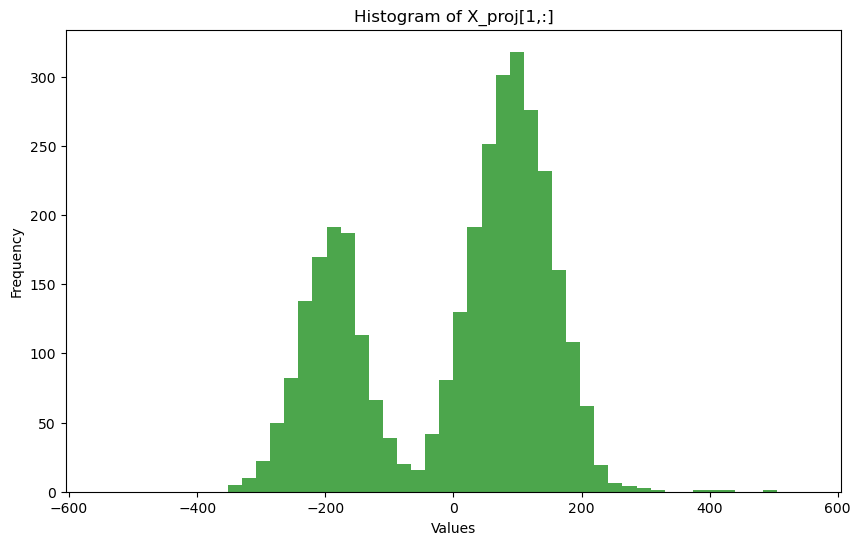

In [10]:
# TODO show a histogram of the first principal component

# Set the number of bins and the range
num_bins = 50
bin_range = [-550, 550]

# Create separate figures for each histogram
plt.figure(figsize=(10, 6))

# Plot histogram of X_proj[0, :]
plt.hist(X_proj[0, :], bins=num_bins, range=bin_range, color='blue', alpha=0.7)
plt.title('Histogram of X_proj[0,:]')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()



# TODO show a histogram of the second principal component 

# Create a new figure for the second histogram
plt.figure(figsize=(10, 6))

# Plot histogram of X_proj[1, :]
plt.hist(X_proj[1, :], bins=num_bins, range=bin_range, color='green', alpha=0.7)
plt.title('Histogram of X_proj[1,:]')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


## 4.2 Visualize data with PC1 and PC2
1. [2 pt] Create scatter plot of the data projected onto the first two principal components.
    - y axis: PC2
    - x axis: PC1
    - Include title, axis labels

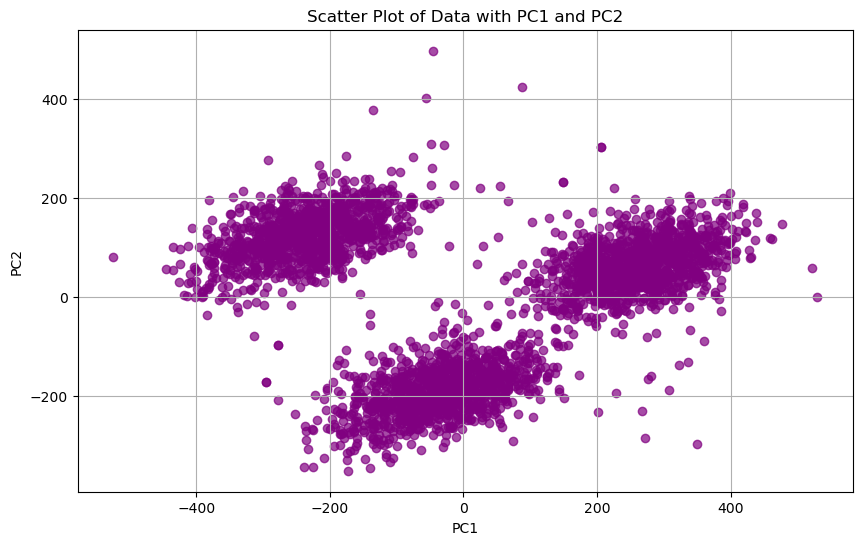

In [11]:
# TODO scatter

plt.figure(figsize=(10, 6))
plt.scatter(X_proj[0, :], X_proj[1, :], color='purple', alpha=0.7)

# Add labels and title
plt.title('Scatter Plot of Data with PC1 and PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


2. [1 pt] What does the scatter plot suggest about the number of potential neuronal clusters?

    **Ans:** The scatter plot suggests there are three potential neuronal clusters.
    